In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')
data.shape

(2443651, 9)

In [4]:
data.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


Part 1: 1. Frequency Tables

In [27]:
data_cat = data['category'].value_counts()
data_cat

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [25]:
data_table = pd.crosstab(index = data["category"],  # Make a crosstab
                              columns="count")
data_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [30]:
# Top 5 most listed product categories
top_5 = data_cat.head()
top_5

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

2. Visualizations

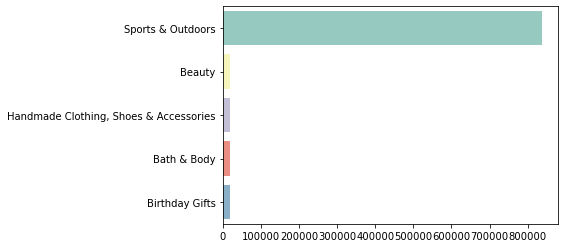

In [32]:
# Bar plot
sns.barplot(y=top_5.index, x=top_5.values, palette="Set3");

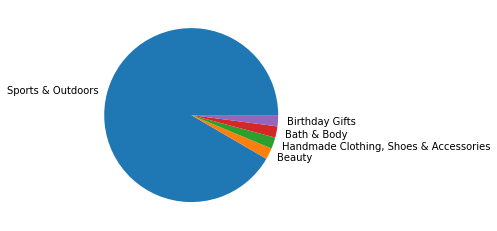

In [39]:
# Pie chart
label = ['Sports & Outdoors','Beauty','Handmade Clothing, Shoes & Accessories','Bath & Body','Birthday Gifts']
plt.pie(top_5, labels = label)
plt.show()

From the above pie chart we can clearly see that sports and outdoors category highly domenates the other four categories.

Part 2. 1.Measures of Centerality

In [44]:
pr_price = data['price']
# Mean
pr_price.mean()
# meadian
pr_price.median()
# Mode
pr_price.mode()

0    9.99
dtype: float64

In [45]:
pr_price.mean()

89.24380943985244

When we compare the average value with the mode, we can observe that there is high potential of values counted as an outlier.  

2. Measures of dispersion

In [55]:
# variance
pr_price.var()
# standared deviation
pr_price.std()
# range
pr_price.max() - pr_price.min()
# Interquartile range
pr_price.quantile(0.75) - pr_price.quantile(0.25)

36.0

According to the above output there is a significant spread of price.

3. Visualizations

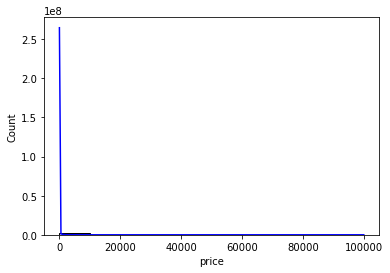

In [75]:
sns.histplot(pr_price, kde=True, bins=10, color="blue")

Part.3.1. Measures of centrality

In [66]:
data_rate = data['stars']
# Mean
data_rate.mean()
# Median
data_rate.median()
# Mode
data_rate.mode()

0    0.0
dtype: float64

From the median and mode we can understand that most of the customers do not rate the products they bought.

2. Measures of despersion

In [67]:
# variance
data_rate.var()
# standared deviation
data_rate.std()
# range
data_rate.max() - data_rate.min()
# Interquartile range
data_rate.quantile(0.75) - data_rate.quantile(0.25)

4.4

The ratings are some how consistente, doesn't show much of a diference.

3. Shape of distribution

In [73]:
# skewness
data_rate.skew()
# kurtosis
data_rate.kurtosis()

-1.9260061280432985

The postive skew value of 0.08 shows that the ratings are slightly right skewed and the negative value of kurtosis demonstrates that lighter tails and less sharper peak compared to a normal distribution.This means, there are less outliers.

4. Visualizations

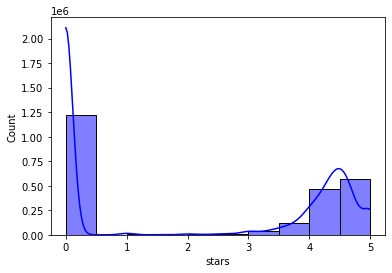

In [74]:
sns.histplot(data_rate, kde=True, bins=10, color="blue")

As we can see from the above histogram the value 0 is dominating and afterthat 3 to 5 is most common. This shows that most of the customers didn't rate and the who rate gave the start in between 3 and 5.